# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


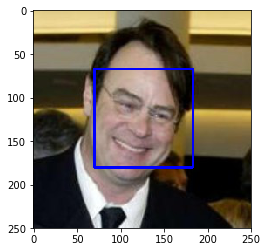

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__  
1. 98% of the first 100 human images have human faces.
2. 1% of the first 100 dog images resemble human face

In [4]:
from tqdm import tqdm
import cv2  

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
correct_humans = 0
correct_dogs = 0

for i in tqdm(range(len(human_files_short))):
    isFaceDetected = face_detector(human_files_short[i])
    isFaceInDogFile = face_detector(dog_files_short[i])
    if isFaceDetected:
        correct_humans += 1
    elif isFaceInDogFile:
        correct_dogs += 1

print('Processed {} files \t detected faces : {}% \t detected dogs : {}%'.format(
            i+1,
            correct_humans,
            correct_dogs))

100%|██████████| 100/100 [00:32<00:00,  3.12it/s]

Processed 100 files 	 detected faces : 98% 	 detected dogs : 1%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [4]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
print(VGG16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:59<00:00, 9232851.00it/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # read image and add dim=0 as 3 to indicate RGB mode
    rgb_img = Image.open(img_path)
    
    # add data transform to have all images consistent
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ToTensor()])
    
    # img tensor
    img = data_transform(rgb_img)
    img = img.unsqueeze(0)
        
    # output from VGG16 - all elements are probabilities for each class
    output = VGG16(img)
    
    with torch.no_grad():
        softmax = torch.exp(output)
    
    pred_idx = np.argmax(softmax.numpy(), axis=1)
    
    return pred_idx # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [6]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    
    if pred < 1000:
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
1. Dog detector found 0% of dogs in human_files_short
2. 100% of the images in dog_files_short are detected as dogs

In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

from tqdm import tqdm

totalDogsDetected = 0
totalFacesDetected = 0

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]


for i in tqdm(range(len(human_files_short))):
    isDogDetected = dog_detector(dog_files_short[i])
    isFaceDetected = dog_detector(human_files_short[i])
    if isDogDetected:
        totalDogsDetected += 1
    elif isFaceDetected:
        totalFacesDetected += 1

print('Processed {} files \t total dogs detected : {}% \t total faces detected in wrong database : {}%'.format(
            i+1,
            totalDogsDetected,
            totalFacesDetected))


100%|██████████| 100/100 [02:44<00:00,  1.64s/it]

Processed 100 files 	 total dogs detected : 100% 	 total faces detected in wrong database : 0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [15]:
import os
import numpy as np
import torch
from torchvision import datasets, transforms
from PIL import ImageFile
import matplotlib.pyplot as plt

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

ImageFile.LOAD_TRUNCATED_IMAGES = True

# Data load parameters
batch_size = 20
num_workers = 0
loaders_scratch = {}

# Data Augmentation
data_transform_train = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),         
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))                             
        ])
data_transform_test = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ])

# load data using Image Folder
train_data = datasets.ImageFolder(train_dir, transform=data_transform_train)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform_test)
test_data = datasets.ImageFolder(test_dir, transform=data_transform_test)

# Data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
                                          num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                         num_workers=num_workers)

loaders_scratch['train'] = train_loader
loaders_scratch['valid'] = valid_loader
loaders_scratch['test'] = test_loader


In [16]:
print('length of training images: ', len(loaders_scratch['train']))

length of training images:  334


In [17]:
use_cuda = torch.cuda.is_available()

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
1. CenterCrop, Resize, RandomHorizontalFlip, RandomRotation.. data augmentation techniques are used. I tried with large pizel size around 800, 600,.. but often observed computation overflow. Did some research and resized images to (224, 224)
2. Since dogs' faces can be tilted or pictured straight, I went with Rotation and Horizontal Flip (in case of a sleeping dog). Normalized tensor to squeeze all pixel values to same scale as the images can have different background.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [18]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # 224
        self.norm1 = nn.BatchNorm2d(16) 
            
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # 112
        self.norm2 = nn.BatchNorm2d(32)
                        
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) # 56
        self.norm3 = nn.BatchNorm2d(64)
                
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1) # 28
        self.norm4 = nn.BatchNorm2d(128)
        
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1) # 14
        self.norm5 = nn.BatchNorm2d(256)
            
        self.pool = nn.MaxPool2d(2, 2) 
        self.activate = nn.ReLU()       
        self.drop = nn.Dropout(0.2)
            
        self.fc1 = nn.Linear(256 * 7 * 7, 512, bias=True)        
        self.fc2 = nn.Linear(512, 133, bias=True)
        
    def forward(self, x):
        ## Define forward behavior
        
        # layer 1
        x = self.pool(self.norm1(self.activate(self.conv1(x))))
        #x = self.pool(self.activate(self.conv1(x)))
        
        # layer 2
        x = self.pool(self.norm2(self.activate(self.conv2(x))))
        #x = self.pool(self.activate(self.conv2(x)))
        
        # layer 3
        x = self.pool(self.norm3(self.activate(self.conv3(x))))
        #x = self.pool(self.activate(self.conv3(x)))
        
        # layer 4
        x = self.pool(self.norm4(self.activate(self.conv4(x))))
        
        # layer 5
        x = self.pool(self.norm5(self.activate(self.conv5(x))))
        
        # flatten
        x = x.view(-1, 256 * 7 * 7)
        
        # fc 1
        x = self.activate(self.fc1(self.drop(x)))
        
        # fc 2
        x = self.fc2(self.drop(x))
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (activate): ReLU()
  (drop): Dropout(p=0.2)
  (fc1): Linear(in_f

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
1. Did some research around resnet, Inception, vgg16 to study the depths at each layers. So started with 3 conv layers with depths 16, 32 and 64 to keep number of computations to minimum, and 2 fully connected layers with number of hidden units chosen to be below of number of output classes.
2. Started training with Adam optimizer with lr=0.001, increased to 0.1 and 0.5 subsequently which didn't improve accuracy past 1%
3. To address large validation loss, researched on techniques to reduce overfitting, used dropout (to leave out few neurons while training) and batchNorm (to normalize each layers pixel values), validation loss lingered around 4.88.
4. Upon tweaking learning rates and not much improvement in validation loss, interpreted that as loss is at local minima, introducted SGD optmizer and momentum, which drastically imrpoved accuracy. But the accuracy never exceeded 6%.
5. added CNN layer 4 and layer 5 with more depth and introduced learning rate scheduler to adjust the learning rate for each epoch/step. Finally, achieved 13% accuracy. I could have trained for more epochs but consumed 10 hours GPU processing power.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [140]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

In [141]:
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer_scratch, step_size=1, gamma=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        scheduler.step()
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            
            output = model(data)
            
            loss = criterion(output, target)
            loss.backward()
            
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model




In [143]:
# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.001161 	Validation Loss: 3.989763
Epoch: 2 	Training Loss: 3.633916 	Validation Loss: 3.814644
Epoch: 3 	Training Loss: 3.551651 	Validation Loss: 3.807063
Epoch: 4 	Training Loss: 3.528512 	Validation Loss: 3.806051
Epoch: 5 	Training Loss: 3.531502 	Validation Loss: 3.805625
Epoch: 6 	Training Loss: 3.534780 	Validation Loss: 3.805722
Epoch: 7 	Training Loss: 3.536496 	Validation Loss: 3.804018
Epoch: 8 	Training Loss: 3.540598 	Validation Loss: 3.807564
Epoch: 9 	Training Loss: 3.532715 	Validation Loss: 3.809078
Epoch: 10 	Training Loss: 3.532210 	Validation Loss: 3.807635


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [145]:

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.752952


Test Accuracy: 13% (112/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [12]:
## TODO: Specify data loaders
import os
import numpy as np
import torch
from torchvision import datasets, transforms
from PIL import ImageFile
import matplotlib.pyplot as plt

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

ImageFile.LOAD_TRUNCATED_IMAGES = True

# Data load parameters
batch_size = 20
num_workers = 0
loaders_transfer = {}

# Data Augmentation
data_transform_train = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),         
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))                             
        ])
data_transform_test = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ])

#transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
# load data using Image Folder
train_data = datasets.ImageFolder(train_dir, transform=data_transform_train)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform_test)
test_data = datasets.ImageFolder(test_dir, transform=data_transform_test)

# Data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
                                          num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                         num_workers=num_workers)

loaders_transfer['train'] = train_loader
loaders_transfer['valid'] = valid_loader
loaders_transfer['test'] = test_loader

data_transfer = {'train' : train_data,
                'valid' : valid_data,
                'test' : test_data}


In [30]:
print('length of training examples: ', len(loaders_transfer['train']))

length of training examples:  334


In [5]:
print(train_data.classes)

['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Cane_corso', '045.Cardigan_welsh_

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [42]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet18(pretrained=True)

use_cuda = torch.cuda.is_available()
    
print(model_transfer)

# freezing trained parameters for conv layers
for param in model_transfer.parameters():
    param.requires_grad = False

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
1. I went with ResNet as I found it more simpler than VGG16 as it has less number of input features on fully connected layer, and want to experiment with popular CNN model other than VGG16.  
2. Small dataset and similar images, so froze all parameters before updating the output classes of fully connected layer.
3. Because, it is a pretrained network, I wan't expecting much validation loss, so didn't feel the need to use momentum like before. so went ahead with Adam optimizer as the instructor suggested it as the go to optim.
4. Reused train and test functions from above model_scratch training and testing.
5. large learning rates increased validation loss so settled with lr=0.001 and used learning rate scheduler to adjust lr for each step.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [43]:
# replace last fully connected layer to match 133 outputs
print("number of input features of last fc layer: ", model_transfer.fc.in_features) #  4096
print("number of outputs on pretrained network: ", model_transfer.fc.out_features) # 133

in_features = model_transfer.fc.in_features
out_features = 133

# define a new fc layer
model_transfer.fc = nn.Linear(in_features, out_features, bias=True)

number of input features of last fc layer:  512
number of outputs on pretrained network:  1000


In [44]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

scheduler = StepLR(optimizer_transfer, step_size=1, gamma=0.1)

In [45]:
if use_cuda:
    model_transfer = model_transfer.cuda()

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [46]:
# train the model
n_epochs = 10
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.708782 	Validation Loss: 1.327487
Epoch: 2 	Training Loss: 1.261390 	Validation Loss: 1.130962
Epoch: 3 	Training Loss: 1.175333 	Validation Loss: 1.136211
Epoch: 4 	Training Loss: 1.172017 	Validation Loss: 1.131276
Epoch: 5 	Training Loss: 1.188222 	Validation Loss: 1.122206
Epoch: 6 	Training Loss: 1.173546 	Validation Loss: 1.120425
Epoch: 7 	Training Loss: 1.170343 	Validation Loss: 1.134650
Epoch: 8 	Training Loss: 1.173484 	Validation Loss: 1.131102
Epoch: 9 	Training Loss: 1.168159 	Validation Loss: 1.120649
Epoch: 10 	Training Loss: 1.177732 	Validation Loss: 1.144500


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [47]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.142335


Test Accuracy: 75% (631/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [59]:
import torch.nn as nn
from torchvision import models

use_cuda = torch.cuda.is_available()

if use_cuda:
    map_location = lambda storage, loc: storage.cuda()
else:
    map_location = 'cpu'
    
model_transfer = models.resnet18(pretrained=True)
model_transfer.fc = nn.Linear(512, 133, bias=True)
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=map_location))

if use_cuda:
    model_transfer.cuda()

In [67]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]


def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    rgb_img = Image.open(img_path)
    
    data_transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
    
    # img tensor
    img = data_transform(rgb_img)
    img = img.unsqueeze(0)
    
    model_transfer.eval()
    # output from model_transfer - all elements are probabilities for each class
    output = model_transfer(img)
        
    _, pred_idx = torch.max(output, 1)
      
    breed = class_names[pred_idx]
    
    return breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [69]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    img = Image.open(img_path)
    
    # uses OpenCV's cascade technique
    isFaceDetected = face_detector(img_path)
    
    # uses pretrained VGG16 CNN
    isDogDetected = dog_detector(img_path)
    
    breedDetected = predict_breed_transfer(img_path)
    
    plt.imshow(img)
    plt.show()
    
    if isFaceDetected==True:
        print('Hey Man! you look like - ', breedDetected)        
    elif isDogDetected==True:        
        print('Hello Buddy - ', breedDetected)
    else:
        print('ERR -- Neither human or dog is detected')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

O

1. Train over larger dataset
2. Improve Data augmentation to addresses faces (humans/dogs) skewed on the image.
3. adjust normalization mean and std to predict better.
4. learn for more epochs.

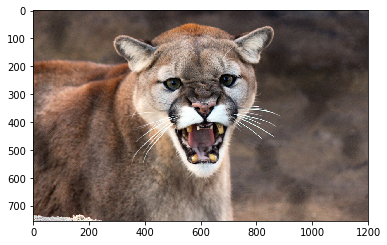

Hello Buddy -  Greyhound


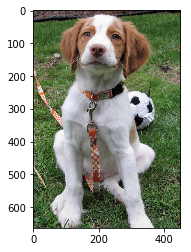

Hello Buddy -  Brittany


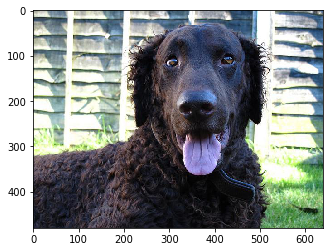

Hello Buddy -  Curly-coated retriever


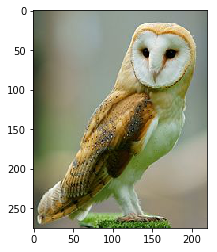

Hello Buddy -  Australian cattle dog


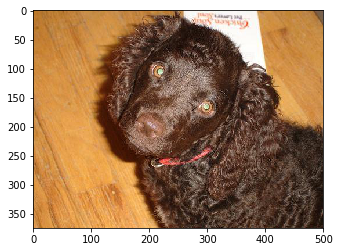

Hello Buddy -  Boykin spaniel


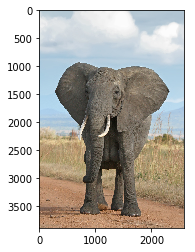

Hey Man! you look like -  Xoloitzcuintli


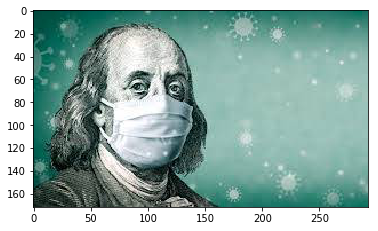

Hey Man! you look like -  Dachshund


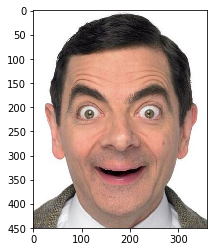

Hey Man! you look like -  German shorthaired pointer


In [87]:
from glob import glob

test_list = glob('/home/workspace/dog_project/images/test/*')

for i in range(8):
       
    run_app(test_list[i])

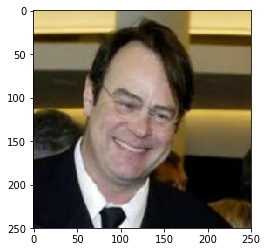

Hey Man! you look like -  Xoloitzcuintli


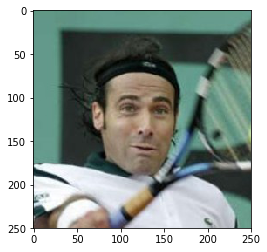

Hey Man! you look like -  Dachshund


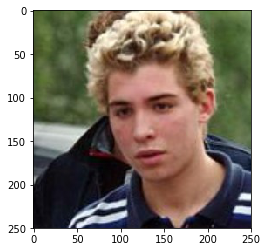

Hey Man! you look like -  Doberman pinscher


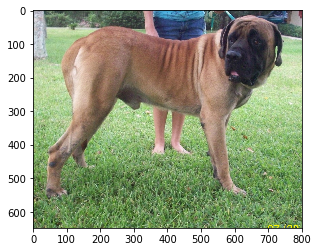

Hello Buddy -  Bullmastiff


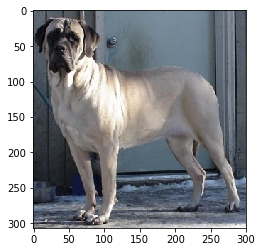

Hello Buddy -  Mastiff


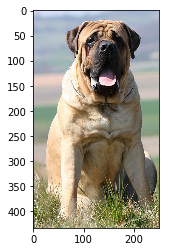

Hello Buddy -  Bullmastiff


In [70]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)